# Creating Heat Map in Python

## Heat Map by McKay Johns

Made from [video](https://www.youtube.com/watch?v=N46zGdX_xsY) by McKay Johns. Sources are on [GitHub](https://github.com/mckayjohns/passmap)

### Getting data from Statsbomb API

In [1]:
import pandas as pd
from statsbombpy import sb

sb.competitions()
sb.matches(competition_id = 43, season_id = 3)
events = sb.events(match_id = 8657)

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


### Clear data

- Select only one team (Belgium).
- Split location and pass_end_location to separate columns for x and y coordinates
- Change NaN at outcome to Successful string

In [2]:
# Get unique team names
team1, team2 = events['team'].unique()

# Create mask to filter events dataframe
mask_team1 = (events['type'] == 'Pass') & (events['team'] == team1)

# Filter
df_pass_belgium = events.loc[mask_team1, ['team', 'player', 'minute', 'second', 'type', 'pass_outcome', 'location', 'pass_end_location']]

# Get complete mask to filter complete passes
mask_complete = df_pass_belgium['pass_outcome'].isnull()

df_pass_belgium.head()

,team,player,minute,second,type,pass_outcome,location,pass_end_location
6,Belgium,Romelu Lukaku Menama,0,0,Pass,NaN,"[61.0, 41.0]","[51.0, 41.0]"
7,Belgium,Axel Witsel,0,2,Pass,NaN,"[51.0, 40.0]","[37.0, 18.0]"
8,Belgium,Jan Vertonghen,0,4,Pass,NaN,"[33.0, 18.0]","[28.0, 35.0]"
9,Belgium,Vincent Kompany,0,7,Pass,NaN,"[21.0, 44.0]","[22.0, 73.0]"
10,Belgium,Toby Alderweireld,0,15,Pass,NaN,"[50.0, 76.0]","[56.0, 78.0]"


In [3]:
# Split location column to x, y columns, and drop location column
df_pass_belgium[['x','y']] = df_pass_belgium['location'].to_list()
df_pass_belgium.drop('location', axis=1, inplace=True)

# Split pass_end_location column to endX and endY columns, and drop pass_end_location column
df_pass_belgium[['endX','endY']] = df_pass_belgium['pass_end_location'].to_list()
df_pass_belgium.drop('pass_end_location', axis=1, inplace=True)

# Fill NaN at pass_outcome column with Successful string
df_pass_belgium['pass_outcome'] = df_pass_belgium['pass_outcome'].fillna('Successful')

# Rename pass_outcome column to just outcome
df_pass_belgium.rename(columns={'pass_outcome': 'outcome'}, inplace=True)
df_pass_belgium.head(10)

,team,player,minute,second,type,outcome,x,y,endX,endY
6,Belgium,Romelu Lukaku Menama,0,0,Pass,Successful,61.0,41.0,51.0,41.0
7,Belgium,Axel Witsel,0,2,Pass,Successful,51.0,40.0,37.0,18.0
8,Belgium,Jan Vertonghen,0,4,Pass,Successful,33.0,18.0,28.0,35.0
9,Belgium,Vincent Kompany,0,7,Pass,Successful,21.0,44.0,22.0,73.0
10,Belgium,Toby Alderweireld,0,15,Pass,Successful,50.0,76.0,56.0,78.0
11,Belgium,Thomas Meunier,0,16,Pass,Successful,55.0,78.0,57.0,63.0
12,Belgium,Youri Tielemans,0,18,Pass,Successful,55.0,61.0,49.0,72.0
13,Belgium,Toby Alderweireld,0,20,Pass,Successful,46.0,71.0,28.0,49.0
14,Belgium,Vincent Kompany,0,24,Pass,Successful,28.0,42.0,29.0,22.0
15,Belgium,Jan Vertonghen,0,27,Pass,Successful,32.0,19.0,8.0,43.0


### Filter passes for one player

In [4]:
# Group all passes by player and count them
df_pass_belgium.value_counts(subset=['player'])

player                  
Kevin De Bruyne             64
Toby Alderweireld           62
Eden Hazard                 58
Axel Witsel                 51
Jan Vertonghen              49
Youri Tielemans             46
Vincent Kompany             39
Thomas Meunier              38
Thibaut Courtois            28
Thomas Vermaelen            18
Dries Mertens               14
Nacer Chadli                11
Romelu Lukaku Menama        11
Moussa Sidi Yaya Dembélé    10
dtype: int64

In [5]:
# Filter passes for Kevin De Bruyne
mask_de_bruyne = df_pass_belgium['player'] == 'Kevin De Bruyne'
df_pass_bruyne = df_pass_belgium[mask_de_bruyne].reset_index()
df_pass_bruyne.head(10)

,index,team,player,minute,second,type,outcome,x,y,endX,endY
0,79,Belgium,Kevin De Bruyne,5,18,Pass,Incomplete,64.0,60.0,72.0,60.0
1,81,Belgium,Kevin De Bruyne,5,23,Pass,Successful,71.0,77.0,76.0,67.0
2,127,Belgium,Kevin De Bruyne,8,4,Pass,Incomplete,104.0,54.0,108.0,46.0
3,165,Belgium,Kevin De Bruyne,11,29,Pass,Incomplete,93.0,9.0,92.0,4.0
4,178,Belgium,Kevin De Bruyne,12,19,Pass,Successful,58.0,39.0,60.0,29.0
5,200,Belgium,Kevin De Bruyne,14,49,Pass,Successful,85.0,36.0,81.0,55.0
6,208,Belgium,Kevin De Bruyne,15,4,Pass,Successful,88.0,61.0,80.0,65.0
7,224,Belgium,Kevin De Bruyne,15,46,Pass,Successful,74.0,49.0,65.0,45.0
8,227,Belgium,Kevin De Bruyne,15,58,Pass,Successful,75.0,30.0,77.0,16.0
9,229,Belgium,Kevin De Bruyne,16,3,Pass,Successful,91.0,31.0,107.0,32.0


### Importing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns

### Plotting Pass Map

Text(0.5, 1.0, 'De Bruyne Pass Map vs England. WC 2018')

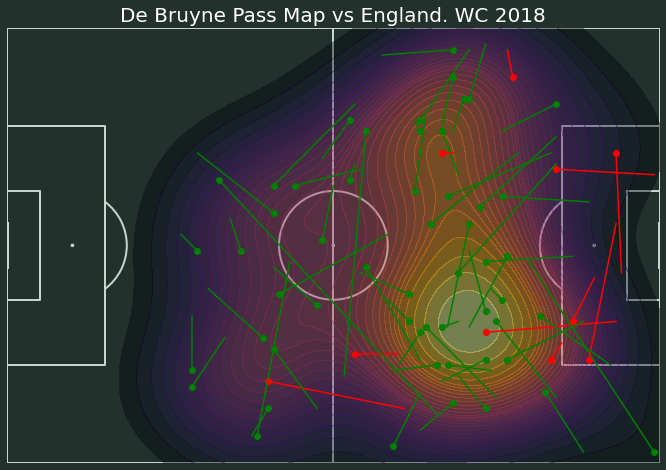

In [20]:
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# Create and draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',
              figsize=(16, 11), constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)

# Create the heatmap
kde = sns.kdeplot(
    x = df_pass_bruyne['x'],
    y = df_pass_bruyne['y'],
    shade = True,
    alpha = .4,
    levels = 30,
    cmap = 'inferno'
)
# See all colormaps here https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Plot each pass in a for loop
for x in range(len(df_pass_bruyne['x'])):
    if df_pass_bruyne['outcome'][x] == 'Successful':
        x_line = df_pass_bruyne['x'][x],df_pass_bruyne['endX'][x]
        y_line = df_pass_bruyne['y'][x],df_pass_bruyne['endY'][x]
        plt.plot(x_line, y_line, color='green')
        plt.scatter(df_pass_bruyne['x'][x], df_pass_bruyne['y'][x], color='green')
    if df_pass_bruyne['outcome'][x] != 'Successful':
        x_line = df_pass_bruyne['x'][x],df_pass_bruyne['endX'][x]
        y_line = df_pass_bruyne['y'][x],df_pass_bruyne['endY'][x]
        plt.plot(x_line, y_line, color='red')
        plt.scatter(df_pass_bruyne['x'][x], df_pass_bruyne['y'][x], color='red')

# Limit heatmap not to go outside the pitch
plt.xlim(0, 120)
plt.ylim(80, 0)

plt.title("De Bruyne Pass Map vs England. WC 2018", color='white', size=20)

In [21]:
fig.savefig('de-bruyne-pass-heat-maps-vs-england-wc-2018-bronze-medal.png')